<a href="https://colab.research.google.com/github/ProdKEYMON/Data_keymon/blob/main/Chapter5_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,556 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Class 101/ML

/content/drive/MyDrive/Colab Notebooks/Class 101/ML


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [4]:
# 학습 데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split

# 특성공학 + 학습 pipe 구성
# 연속형 데이터와 범주형 데이터를 따로 처리하는 pipe
from sklearn.compose import make_column_transformer
# 각각의 처리기법을 파이프 형태로 구성
from imblearn.pipeline import make_pipeline
# 연속형 데이터 전처리
from sklearn.impute import KNNImputer, SimpleImputer
# 범주형 데이터 전처리
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# Imbalance Data Sampling
from imblearn.over_sampling import SMOTE

# 알고리즘으로 학습
from sklearn.tree import DecisionTreeClassifier
# 교차검증 + Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
# 평가 지표
from sklearn.metrics import classification_report

In [36]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class 101/datas/05_Market.csv')

,회원번호,조합원상태,주소-구,주소-동,성별,연령,연령대,총구매금액,총구매수량,1회방문시구매금액(평균),배송서비스신청여부,모바일알람여부,Gold_member
0,272369856,정상회원,수지구,풍덕천동,여,45.0,40대,5733884,546.5,47782,미신청,수신,VIP
1,1506656256,정상회원,수지구,풍덕천동,여,36.0,30대이하,673414,90.0,35443,미신청,.,normal
2,1476143616,정상회원,수지구,풍덕천동,여,34.0,30대이하,655919,66.0,46851,미신청,.,normal
3,716128320,정상회원,수지구,풍덕천동,여,51.0,50대,2984534,252.1,48138,미신청,.,normal
4,743192512,정상회원,수지구,성복동,여,51.0,50대,1901488,152.0,158457,신청,.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,1645334720,정상회원,수지구,동천동,남,32.0,30대이하,52646,1.1,52646,미신청,.,normal
6515,963408768,정상회원,분당구,백현동,여,46.0,40대,61740,9.0,61740,미신청,.,normal
6516,309812800,정상회원,기타,기타,여,82.0,70대이상,15507,2.0,15507,미신청,.,normal
6517,96714304,정상회원,분당구,백현동,여,55.0,50대,36374,2.0,36374,미신청,.,normal


In [37]:
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class 101/datas/05_Market.csv')
df1 = raw.copy()
df1.head()

,회원번호,조합원상태,주소-구,주소-동,성별,연령,연령대,총구매금액,총구매수량,1회방문시구매금액(평균),배송서비스신청여부,모바일알람여부,Gold_member
0,272369856,정상회원,수지구,풍덕천동,여,45.0,40대,5733884,546.5,47782,미신청,수신,VIP
1,1506656256,정상회원,수지구,풍덕천동,여,36.0,30대이하,673414,90.0,35443,미신청,.,normal
2,1476143616,정상회원,수지구,풍덕천동,여,34.0,30대이하,655919,66.0,46851,미신청,.,normal
3,716128320,정상회원,수지구,풍덕천동,여,51.0,50대,2984534,252.1,48138,미신청,.,normal
4,743192512,정상회원,수지구,성복동,여,51.0,50대,1901488,152.0,158457,신청,.,normal


In [38]:
x = df1[['주소-구','성별','연령','배송서비스신청여부','모바일알람여부']]
y = df1['Gold_member'].replace({'VIP': 1, 'normal': 0})

In [39]:
from sklearn.model_selection import train_test_split

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [40]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=43)

In [41]:
numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                             MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                              OneHotEncoder(handle_unknown='ignore'))

numeric_list = x.describe().columns.tolist()
category_list = x.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe, category_list))

In [42]:
model_pipe = make_pipeline(preprocessing_pipe, SMOTE(), RandomForestClassifier())

In [43]:
hyper_parameter = {'randomforestclassifier__max_depth': range(5,10),
                   'randomforestclassifier__min_samples_split':range(5,10),
                   'randomforestclassifier__class_weight':['balanced']}

grid_model = GridSearchCV(model_pipe, cv = 3, param_grid = hyper_parameter, n_jobs=-1, scoring = 'f1')
grid_model.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['연령']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주소-구',
                                                                          '성별',
                                                                          '배송서비스신청여부',
                                                                          '모바일알람여부'])])),
                                       ('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__class_weight': ['balanced'],
                         'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__min_samples_split': range(5, 10)},
             scoring='f1')

In [44]:
best_model = grid_model.best_estimator_

In [45]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [48]:
print(classification_report(y_test, y_test_pred))
print()
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      4498
           1       0.08      0.80      0.14        65

    accuracy                           0.86      4563
   macro avg       0.54      0.83      0.53      4563
weighted avg       0.98      0.86      0.91      4563


              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1925
           1       0.08      0.84      0.15        31

    accuracy                           0.85      1956
   macro avg       0.54      0.84      0.53      1956
weighted avg       0.98      0.85      0.91      1956



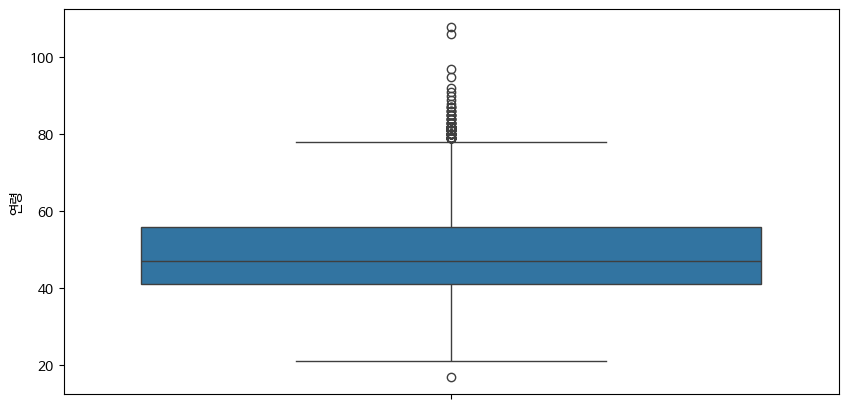

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot( y= '연령', data = df2)
plt.show()

In [ ]:
(df2['연령'] > 80).value_counts()

연령
False    6459
True       57
Name: count, dtype: int64

In [ ]:

df1 = df1[~df1['조합원상태'].str.contains('탈퇴신청|탈퇴처리중|이관처리중')]

In [ ]:
df1['조합원상태'].replace({'정상회원':0, '탈퇴':1}, inplace=True)

In [ ]:
df1['Gold_member'].replace({'normal':0, 'VIP':1}, inplace=True)

In [ ]:
df1['Gold_member'].value_counts() #밸런스가 깨져있는 목표변수, 언더 또는 오버 샘플링 필요

Gold_member
0    6420
1      96
Name: count, dtype: int64

In [ ]:
df2 = pd.get_dummies(df1)

In [ ]:
cond1 = df2.corr(method = 'pearson') >= 0.3
cond2 = df2.corr(method = 'pearson') >= 0.7

In [ ]:
df2.corr(method = 'pearson').describe()

,회원번호,조합원상태,연령,총구매금액,총구매수량,1회방문시구매금액(평균),Gold_member,주소-구_광주,주소-구_기타,주소-구_기흥구,...,성별_여,연령대_30대이하,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,배송서비스신청여부_미신청,배송서비스신청여부_신청,모바일알람여부_.,모바일알람여부_수신
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.002435,0.009126,0.011393,0.020953,0.019558,0.018298,0.019317,0.013902,-0.009822,0.023820,...,-0.002334,-0.001944,-0.009771,0.002217,0.007995,0.007518,-0.002860,0.002860,-0.007493,0.007493
std,0.123253,0.104482,0.157847,0.173574,0.173722,0.117656,0.140104,0.125601,0.147678,0.150394,...,0.148952,0.139991,0.132411,0.123456,0.126004,0.129894,0.155316,0.155316,0.158866,0.158866
min,-0.329741,-0.030754,-0.575580,-0.306895,-0.328673,-0.226981,-0.298709,-0.110672,-0.518988,-0.377019,...,-0.998724,-0.575580,-0.421583,-0.421583,-0.298187,-0.223462,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.021329,-0.006653,-0.016699,-0.022477,-0.023465,-0.008335,-0.009241,-0.006778,-0.028883,-0.019681,...,-0.012669,-0.013330,-0.016950,-0.009354,-0.009358,-0.015700,-0.003021,-0.013608,-0.006371,-0.010014
50%,-0.000835,-0.003242,-0.003926,-0.011170,-0.013211,0.000632,-0.004294,-0.003507,-0.015222,-0.007134,...,0.003158,-0.000164,-0.005914,0.002118,-0.003810,-0.006073,0.006294,-0.006294,0.004743,-0.004743
75%,0.012903,0.000082,0.011497,-0.004618,-0.004566,0.013801,-0.001515,-0.001324,-0.006209,0.002702,...,0.007265,0.016789,0.009340,0.014253,0.013287,-0.001368,0.013608,0.003021,0.010014,0.006371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2[cond1] != False

,회원번호,조합원상태,연령,총구매금액,총구매수량,1회방문시구매금액(평균),Gold_member,주소-구_광주,주소-구_기타,주소-구_기흥구,...,성별_여,연령대_30대이하,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,배송서비스신청여부_미신청,배송서비스신청여부_신청,모바일알람여부_.,모바일알람여부_수신
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6515,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6516,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6517,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
y = df1['Gold_member']

In [ ]:
x = df1.drop(columns=['Gold_member'])

In [ ]:
x_train, x_test_x, y_train_y, y_test_y = train_test_split(x, y, test_size=0.3, random_state=43)

In [ ]:
pipe_list = ()